In [1]:
import cv2
import glob
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
%matplotlib inline

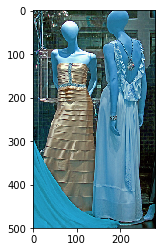

250*250 pixels


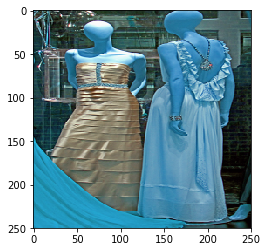

200*200 pixels


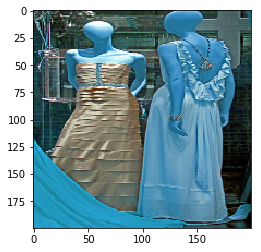

150*150 pixels


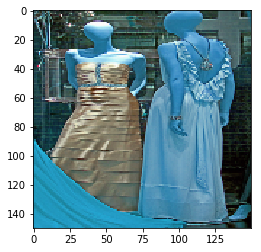

100*100 pixels


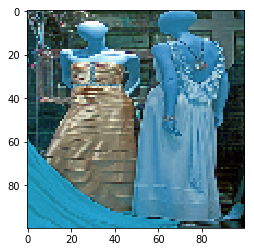

50*50 pixels


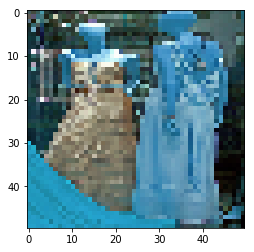

In [2]:
#Choose the resize dimension
test_image = cv2.imread('C:/users/H/Desktop/Female\\n04596852_10.JPEG')
plt.imshow(test_image)
plt.show()

print('250*250 pixels')
new_img = cv2.resize(src = test_image, dsize = (250,250))
normalized_img = cv2.normalize(new_img, alpha = 0.0, beta = 1.0,
                               dst = new_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
plt.show()

print('200*200 pixels')
new_img = cv2.resize(src = test_image, dsize = (200,200))
normalized_img = cv2.normalize(new_img, alpha = 0.0, beta = 1.0,
                               dst = new_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
plt.show()

print('150*150 pixels')
new_img = cv2.resize(src = test_image, dsize = (150,150))
normalized_img = cv2.normalize(new_img, alpha = 0.0, beta = 1.0,
                               dst = new_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
plt.show()

print('100*100 pixels')
new_img = cv2.resize(src = test_image, dsize = (100,100))
normalized_img = cv2.normalize(new_img, alpha = 0.0, beta = 1.0,
                               dst = new_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
plt.show()

print('50*50 pixels')
new_img = cv2.resize(src = test_image, dsize = (50,50))
normalized_img = cv2.normalize(new_img, alpha = 0.0, beta = 1.0,
                               dst = new_img, dtype=cv2.CV_32F, norm_type=cv2.NORM_MINMAX)
plt.imshow(normalized_img)
plt.show()

I chose the image size to be 200x200, as the quality of this image size is reasonable. Lower image size does not keep the original features, while higher image size will lengthen the processing times without significant improvements. 

In [15]:
#Collect all the link to images, open them and flatten them into arrays
paths = ["C:/users/H/Desktop/Male/"]
dataset = []

for pathname in paths:
    final = os.path.join(pathname,'*JPEG')
    images = glob.glob(final)
    
    for i in range(len(images)):
        img = Image.open(images[i])
        next_img = img.resize((200,200))
        dataset.append(np.array(next_img).flatten())

In [16]:
np.savetxt('Male', dataset)

In [17]:
paths = ["C:/users/H/Desktop/Female/"]
dataset = []

for pathname in paths:
    final = os.path.join(pathname,'*JPEG')
    images = glob.glob(final)
    
    for i in range(len(images)):
        img = Image.open(images[i])
        next_img = img.resize((200,200))
        dataset.append(np.array(next_img).flatten())

In [18]:
np.savetxt('Female', dataset)

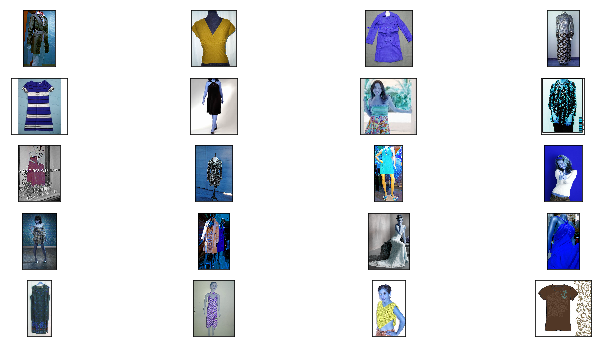

In [4]:
#Open some of the pictures in the female clothes
samples = np.random.choice(images, size=20, replace=False)

position = 1
plt.figure(figsize=(12,6))
for x in samples: 
    plt.subplot(5,4,position)
    pic = cv2.imread (x)
    plt.imshow(pic)
    plt.xticks([]), plt.yticks([])
    position +=1
plt.show()

In [5]:
'''
    Define the label for each dataset. 
    The first 200 datapoints would be labeled '0', representing men's clothes
    The second 200 datapoints would be labeled '1', representing women's clothes

'''

target = []
for i in range(2):
    for j in range(200):
        target.append(i)

In [6]:
x_train, x_test, y_train, y_test = train_test_split (dataset,target, test_size=0.2, stratify = target)

### Apply logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

classifier.score(x_train,y_train)

1.0

In [8]:
classifier.score(x_test,y_test)

0.625

In [9]:
#Print classification scores
y_train_pred = classifier.predict (x_train)
y_test_pred = classifier.predict (x_test)

names = ['Male', 'Female']
print ('Classification report for training set')
print (classification_report(y_train, y_train_pred, target_names = names))

print ('Classification report for test set')
print (classification_report(y_test, y_test_pred, target_names = names))

Classification report for training set
             precision    recall  f1-score   support

       Male       1.00      1.00      1.00       160
     Female       1.00      1.00      1.00       160

avg / total       1.00      1.00      1.00       320

Classification report for test set
             precision    recall  f1-score   support

       Male       0.61      0.68      0.64        40
     Female       0.64      0.57      0.61        40

avg / total       0.63      0.62      0.62        80



## Apply logistic regression after PCA

In [10]:
pca = PCA()
pca.fit(dataset)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [11]:
classifier2 = LogisticRegression()

classifier2.fit(x_train_pca, y_train)
classifier2.score(x_train_pca, y_train)

1.0

In [12]:
classifier2.score(x_test_pca,y_test)

0.6125

In [17]:
component = []
train_score =[]
test_score = []

for x in range (1, 30):
    component.append(x)
    pca = PCA(n_components = x)
    pca.fit (dataset)
    x_train_pca = pca.transform(x_train)
    x_test_pca = pca.transform(x_test)
    
    classifier2 = LogisticRegression()
    classifier2.fit(x_train_pca, y_train)
    
    train = classifier2.score(x_train_pca, y_train)
    train_score.append(train)
    
    test = classifier2.score(x_test_pca,y_test)
    test_score.append(test)

#### Plot the PCA performance

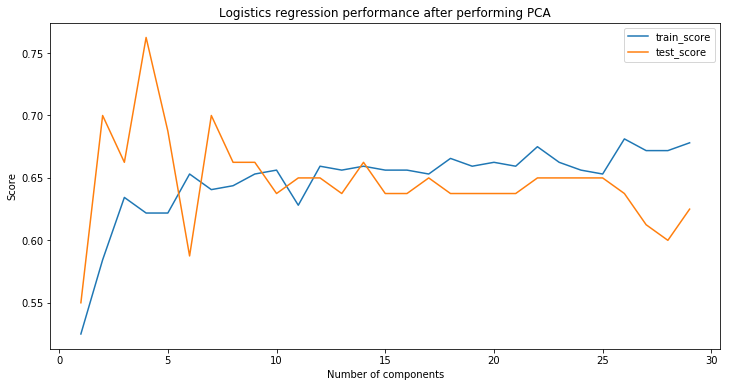

In [18]:
plt.figure (figsize = (12,6))
plt.plot (component, train_score, label = 'train_score')
plt.plot (component, test_score, label = 'test_score')
plt.xlabel ('Number of components')
plt.ylabel ('Score')
plt.title ('Logistics regression performance after performing PCA')
plt.legend()
plt.show()

In [19]:
print ('Maximum test score is:', np.max(test_score))

Maximum test score is: 0.7625


## Apply logistic regression after LDA

In [20]:
lda = LinearDiscriminantAnalysis ()

lda.fit (dataset, target)
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [21]:
classifier3 = LogisticRegression()

classifier3.fit(x_train_lda, y_train)
classifier3.score(x_train_lda, y_train)

0.859375

In [22]:
classifier3.score(x_test_lda, y_test)

0.8875

## Plot the difference in test score between PCA, LDA and original logistics regression

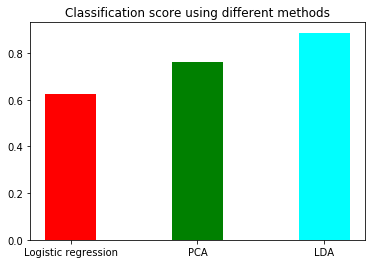

In [23]:
x_axis = ['Logistic regression', 'PCA', 'LDA']
y_axis = [(classifier.score(x_test,y_test)), (np.max(test_score)), classifier3.score(x_test_lda, y_test)]
plt.bar(x_axis, y_axis, color = ['red', 'green', 'cyan'], width = 0.4)
plt.title ('Classification score using different methods')
plt.show()